광고플랫폼에 따른 판매량 예측 실습 #한번에 실행

<Axes: >

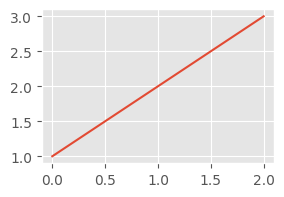

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))
 

In [126]:
!pip install scikit-learn
df = pd.read_csv('advertising.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [127]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### 데이터 이해
### 매체별 광고량에 따른 판매량 그래프 변화

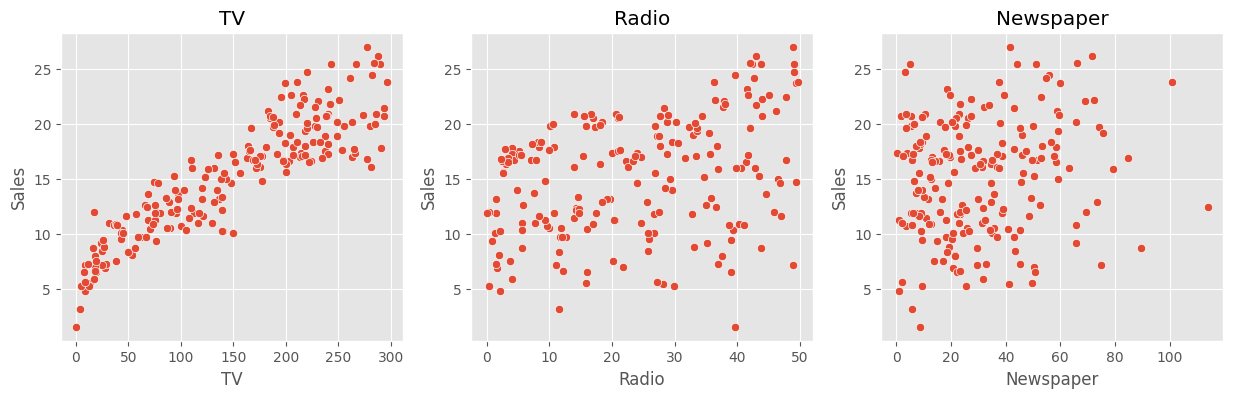

In [128]:
# 시각화

plt.figure(figsize=(15, 4)) # 그래프의 가로, 세로 크기

# TV 광고비와 매출액의 관계
plt.subplot(1, 3, 1) # 1행 3열의 첫 번째 위치
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('TV')  # 그래프 제목

# Radio 광고비와 매출액의 관계
plt.subplot(1, 3, 2) # 1행 3열의 두 번째 위치
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.title('Radio')   # 그래프 제목

# Newspaper 광고비와 매출액의 관계
plt.subplot(1, 3, 3)  # 1행 3열의 세 번째 위치
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.title('Newspaper')  # 그래프 제목

pass # 결과값의 텍스트 출력을 막기 위해 사용


#### 상관계수

<Axes: >

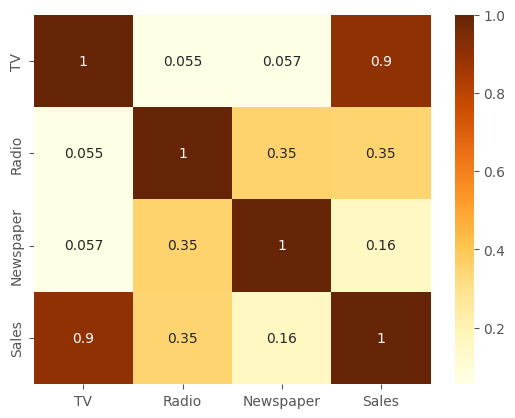

In [129]:
# 상관계수 히트맵 시각화

df.corr() # 상관계수 df.[변수].corr()

#히트맵 표현

sns.heatmap(df.corr(), cmap='YlOrBr', annot=True) # annot=True : 각 셀에 숫자 표시, cmap='Blues' : 색상


# 단순선형회귀

## 독립변수, 종속변수 선택

In [130]:
x = df[['TV']] # 독립변수는 무조건 2차원으로 입력
y = df['Sales'] # 종속변수

## 훈련세트, 테스트세트 분할

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42) # train_test_split(독립변수, 종속변수) : 데이터를 훈련용과 테스트용으로 나눔 random_state=42 : 랜덤 시드값 = 42

x_train.shape, x_test.shape, y_train.shape, y_test.shape # 데이터의 개수 확인

((150, 1), (50, 1), (150,), (50,))

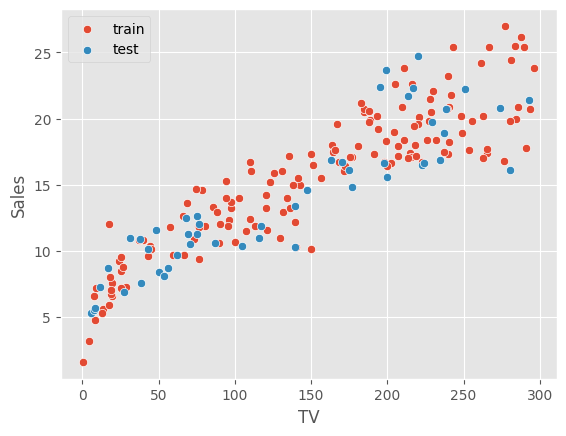

In [132]:
sns.scatterplot(data=df, x=x_train['TV'], y= y_train, label='train') # 훈련용 데이터
sns.scatterplot(data=df, x=x_test['TV'], y= y_test, label='test') # 테스트용 데이터
pass    # 결과값의 텍스트 출력을 막기 위해 사용

### 모델 생성 및 훈련


In [133]:
# LinearRegression 클래스 import
from sklearn.linear_model import LinearRegression   # 선형회귀 모델

# 모델 생성하기
model = LinearRegression()  # 모델 생성

# 모델 학습하기
model.fit(x_train, y_train) # 모델 학습

LinearRegression()

### 테스트 세트로 평가

In [134]:
# 모델 평가를 위한 함수 import
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score  
# 평가를 위한 함수들 mean_squared_error : 평균제곱오차, root_mean_squared_error : 평균제곱근오차, mean_absolute_error : 평균절대오차, r2_score : 결정계수

pred = model.predict(x_test) # 테스트 데이터의 예측값

print(pred)
print(y_test)

# 예측값과 실제값의 차이(Loss/Error) 이용한 모델 평가
mse = mean_squared_error(y_test, pred) # 평균제곱오차
rmse = root_mean_squared_error(y_test, pred) # 평균제곱근오차
mae = mean_absolute_error(y_test, pred) # 평균절대오차
r2 = r2_score(y_test, pred) # 결정계수

print(f'''
mse : {mse: .2f}, 
rmse : {rmse: .2f}, 
mae : {mae: .2f},
r2 : {r2: .2f}''') # 각 평가지표 출력

pass # 결과값의 텍스트 출력을 막기 위해 사용

[16.14347417 17.92138181 23.32156857  7.74687609 19.30050643 11.25838215
 19.10665357  9.86818022 19.41681814 16.79703523  8.8435294  10.21157671
 20.08699517  7.39794095 14.82527473 16.52564123  7.50317536 18.04323218
 11.26945945 20.24761611 19.81006251 10.85406047  9.20354185 20.99533427
 10.92052431 10.06203308 18.92387802 14.81419743 11.92855917  7.56410054
 18.16508254 10.93160162 18.11523467  8.03488605 22.64585289 20.29192533
  9.77402312 22.25814718 13.5901551   8.62198328 13.52369126 16.90226964
  9.48601316 10.54943455 19.50543659  9.21461916 11.00914276 15.25728968
 12.89228481 11.32484598]
95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55    

In [135]:
# 실제값과 예측값 비교
df_pred = pd.DataFrame({'x_test':x_test['TV'],
    'y_test':y_test,
    'y_pred':pred}) # 데이터프레임 생성 : x_test, y_test, y_pred 컬럼 생성 
df_pred['error'] = df_pred['y_test']-df_pred['y_pred'] # 오차 계산
df_pred.head(10)  # 상위 10개 데이터 출력

,x_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


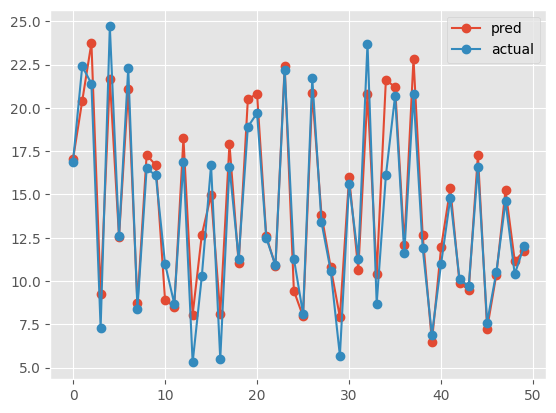

In [148]:
plt.plot(pred, marker='o', label='pred') # 예측값
plt.plot(np.array(y_test), marker='o', label='actual') # 실제값
plt.legend();

In [136]:
mae = abs(df_pred['error']).mean() # 절대값을 취한 오차의 평균값
mse = np.square(df_pred['error']).mean() # 오차의 제곱값의 평균값   
rmse = np.sqrt(mse) # 오차의 제곱값의 제곱근  

# r2_score 계산
rss = np.square(df_pred['y_test'] - df_pred['y_pred']).sum() # 잔차제곱합
tss = np.square(df_pred['y_test'] - df_pred['y_test'].mean()).sum() # 총오차제곱합
r2 = 1 - (rss/tss) # 결정계수

print(f'''
mae : {mae: .2f},
mse : {mse: .2f},
rmse : {rmse: .2f},
r2 : {r2: .2f} ''') # 각 평가지표 출력



mae :  1.87,
mse :  5.51,
rmse :  2.35,
r2 :  0.80 


### 모델의 학습 결과

#### 회귀식 분석 

In [137]:
# 회귀계수(w)
print('회귀계수 :', model.coef_)
w = model.coef_

# 절편(b)
print('절편 :', model.intercept_)
b = model.intercept_

# 회귀식
print('회귀식 :', f'y = {w[0]} * TV + {b}')

회귀계수 : [0.05538653]
절편 : 7.098853680118275
회귀식 : y = 0.05538653085519158 * TV + 7.098853680118275


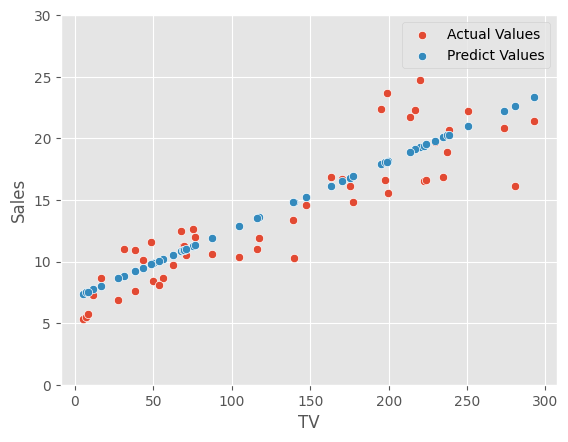

In [138]:
# 테스트데이터 실제값과 예측값 비교(독립변수-종속변수 관계 시각화)

sns.scatterplot(x=x_test['TV'], y=y_test, label='Actual Values') # 실제값

sns.scatterplot(x=x_test['TV'], y=pred, label='Predict Values') # 예측값

plt.ylim(0,30) # y축 범위 설정

pass # 결과값의 텍스트 출력을 막기 위해 사용.

### 새로운 값 예측 

In [139]:
# TV 광고비 입력받기
TV = 100

# 예측 함수 사용하여 예측하기
print(model.predict([[TV]])) 

# 모델이 학습한 공식에 대입하여 예측하기
print(w[0]*TV + b) # y = wx + b

[12.63750677]
12.637506765637433


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 다중회귀 

### 변수 선택

In [140]:
# 독립변수, 종속변수 선택
x2 = df[['TV', 'Radio', 'Newspaper']] # 독립변수 2차원으로 입력
y = df['Sales'] # 종속변수


<Axes: >

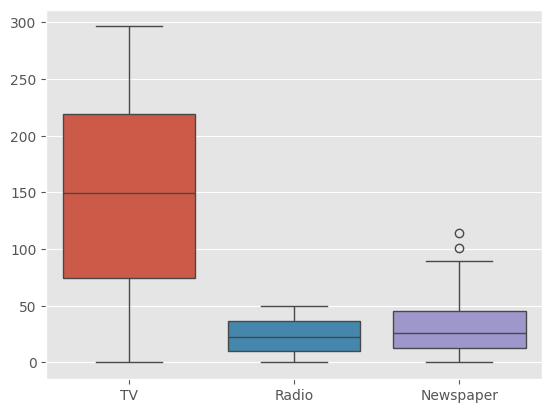

In [141]:
# 독립변수의 데이터 분포 파악
sns.boxplot(data=x2) # 박스플롯으로 데이터 분포 확인

## 독립변수 스케일링 

In [142]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler # 표준화 하기
scaler = StandardScaler() # 스케일러 객체 생성
scaler.fit(x2) # 스케일러 학습
X2_scaled = scaler.transform(x2) # 스케일링

scaled_TV = X2_scaled[:,0] # 스케일링된 TV 광고비
scaled_Radio = X2_scaled[:,1] # 스케일링된 Radio 광고비
scaled_Newspaper = X2_scaled[:,2] # 스케일링된 Newspaper 광고비

print(f'{scaled_TV.mean()}, {scaled_Radio.mean()}, {scaled_Newspaper.mean()}') # 각 변수의 평균값
print(f'{scaled_TV.std()}, {scaled_Radio.std()}, {scaled_Newspaper.std()}') # 각 변수의 표준편차값

1.2212453270876723e-16, -4.529709940470639e-16, 2.220446049250313e-16
1.0, 1.0, 0.9999999999999999


## 훈련 및 평가 

### 모델 훈련 

In [150]:
# 훈련세트, 테스트 세트 분할
from sklearn.model_selection import train_test_split   # 모델 다운

X_train, X_test, y_train, y_test = train_test_split(X2_scaled, y, random_state=42) # 데이터 분할
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # 데이터 개수 확인

(150, 3) (50, 3) (150,) (50,)


In [151]:
# 빈 모델 객체 생성
from sklearn.linear_model import LinearRegression # 선형회귀 모델
model2 = LinearRegression() # 모델 생성

# 모델 학습
model2.fit(X_train, y_train)


LinearRegression()

### 모델 성능 평가

In [152]:
# 테스트 데이터로 예측

pred = model2.predict(X_test) # 테스트 데이터 예측

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score 
# 평가지표 모듈 다운 mean_squared_error : 평균제곱오차, root_mean_squared_error : 평균제곱근오차, mean_absolute_error : 평균절대오차, r2_score : 결정계수 

# 평가지표 계산
mse = mean_squared_error(y_test, pred) # 평균제곱오차
rmse = root_mean_squared_error(y_test, pred) # 평균제곱근오차
mae = mean_absolute_error(y_test, pred) # 평균절대오차
r2 = r2_score(y_test, pred) # 결정계수

print(f'''
mse : {mse: .2f},
rmse : {rmse: .2f},
mae : {mae: .2f},
r2 : {r2: .2f}''') # 각 평가지표 출력


mse :  2.40,
rmse :  1.55,
mae :  1.12,
r2 :  0.91


In [162]:
# 실제값과 예측값 비교
df_pred = pd.DataFrame({'y_test':y_test, 'y_pred':pred}) # 데이터프레임 생성
df_pred['error'] = df_pred['y_test'] - df_pred['y_pred'] # 오차 계산
df_pred.head(10) # 상위 10개 데이터 출력

,y_test,y_pred,error
95,16.9,17.040412,-0.140412
15,22.4,20.399644,2.000356
30,21.4,23.747401,-2.347401
158,7.3,9.256532,-1.956532
128,24.7,21.675259,3.024741
115,12.6,12.561793,0.038207
69,22.3,21.078657,1.221343
170,8.4,8.708955,-0.308955
174,16.5,17.283536,-0.783536
45,16.1,16.684919,-0.584919


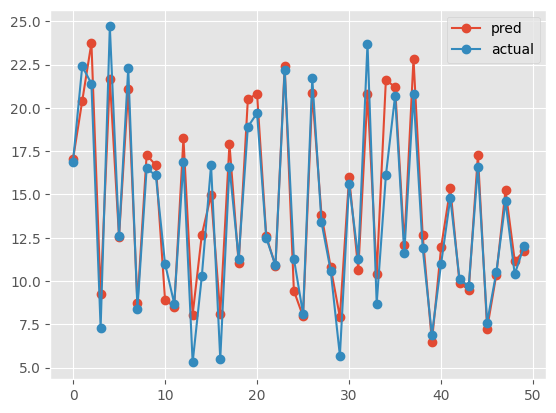

In [159]:
plt.plot(pred, marker='o', label='pred') # 예측값
plt.plot(np.array(y_test), marker='o', label='actual') # 실제값
plt.legend();

### 모델의 학습 결과

In [160]:
# 회귀계수(w)
print('회귀계수 :', model2.coef_)
w = model2.coef_

# 절편(b)
print('절편 :', model2.intercept_)
b = model2.intercept_

# 회귀식
print('회귀식 :', f'y = {w[0]} * TV + {w[1]} * Radio + {w[2]} * Newspaper + {b}')


회귀계수 : [4.67709227 1.4774023  0.09352121]
절편 : 15.22473459736965
회귀식 : y = 4.677092268978724 * TV + 1.4774023036363388 * Radio + 0.0935212124232997 * Newspaper + 15.22473459736965


### 새로운 값 예측학기

In [170]:
# 에측할 값
new_data = [[175, 15, 2]]

# 예측 함수를 이용한 예측
new_data_scaled = scaler.transform(new_data) # 스케일링

model2.predict(new_data_scaled) # 예측
print(model2.predict(new_data_scaled))

# 모델이 학습한 공식에 대입하여 예측
print(f'{w[0]*new_data_scaled[0][0] + w[1]*new_data_scaled[0][1] + w[2]*new_data_scaled[0][2] + b}') # y = wx + b

[15.80426509]
15.804265090536152


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [171]:
new_data_scaled

array([[ 0.32645631, -0.5580147 , -1.3143924 ]])

### 다항회귀 


In [180]:
# polynomialFeatures = 다항회귀 = 선형회귀 + 다항식
from sklearn.preprocessing import PolynomialFeatures # 다항회귀 모듈 다운
poly = PolynomialFeatures(degree=2) # 2차항 추가
X_poly = poly.fit_transform(x2) # 다항식 추가
X_poly.shape # 데이터의 모양 확인


scaler = StandardScaler() # 스케일러 객체 생성
X_poly_scaled = scaler.fit_transform(X_poly) # 스케일러 학습

# 훈련세트, 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, random_state=42) # 데이터 분할
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # 데이터 개수 확인

#모델 생성 및 학습
model3 = LinearRegression() # 모델 생성
model3.fit(X_train, y_train) # 모델 학습   

# 평가(r2_score)
print('훈련 데이터 평가 :', model3.score(X_train, y_train)) # 훈련 데이터 평가
print('테스트 데이터 평가 :', model3.score(X_test, y_test)) # 테스트 데이터 평가

(150, 10) (50, 10) (150,) (50,)
훈련 데이터 평가 : 0.9276607239475623
테스트 데이터 평가 : 0.9485618659991301


### 규제 

In [190]:
#다항식 모델 생성
from sklearn.preprocessing import PolynomialFeatures # 다항회귀 모듈 다운
poly = PolynomialFeatures(degree=9) # 9차항 추가(과적합)
X_poly = poly.fit_transform(x2) # 다항식 추가
X_poly.shape # 데이터의 모양 확인


scaler = StandardScaler() # 스케일러 객체 생성
X_poly_scaled = scaler.fit_transform(X_poly) # 스케일러 학습

# 훈련세트, 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, random_state=42) # 데이터 분할
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # 데이터 개수 확인

#모델 생성 및 학습
from sklearn.linear_model import Ridge, Lasso # 규제 => 릿지, 라쏘 회귀 모듈 다운

model_poly = Ridge(alpha = 10) # 모델 생성
model_poly.fit(X_train, y_train) # 모델 학습   

model_poly2 = Lasso(alpha = 0.1) # 모델 생성
model_poly2.fit(X_train, y_train) # 모델 학습

# 평가(r2_score)
print('훈련 데이터 평가 :', model_poly.score(X_train, y_train)) # 훈련 데이터 평가
print('테스트 데이터 평가 :', model_poly.score(X_test, y_test)) # 테스트 데이터 평가
print('훈련 데이터 평가 :', model_poly2.score(X_train, y_train)) # 훈련 데이터 평가
print('테스트 데이터 평가 :', model_poly2.score(X_test, y_test)) # 테스트 데이터 평가


(150, 220) (50, 220) (150,) (50,)
훈련 데이터 평가 : 0.9216197291137791
테스트 데이터 평가 : 0.944473790302263
훈련 데이터 평가 : 0.9217490452368416
테스트 데이터 평가 : 0.9482128006009242
